In [1]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dotenv import load_dotenv
import os
import pingouin as pg
from sklearn.preprocessing import StandardScaler 


In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


### Group two seperation

In [3]:
group_one = dataset[dataset["Diagnosis"] == 0]
group_two = dataset[dataset["Diagnosis"] == 3]

combined_group_two = pd.concat([group_one, group_two], ignore_index = True)
combined_group_two["Diagnosis"].unique()

array([0, 3])

In [4]:
combined_group_two

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
1,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
2,14,1,78.6137,0,29.0,0.12,188.33,0.49,183.76,39.63,...,241.64,0.44,226.48,35.11,664.29,3.10,8478.33,3.01,1809.0,3292.0
3,15,0,80.9068,0,29.0,0.10,161.28,0.54,174.53,35.94,...,221.76,0.45,NaN,30.57,NaN,3.12,4287.78,2.90,2188.0,3603.0
4,16,0,65.5205,0,28.0,0.12,166.97,0.58,202.96,38.42,...,228.53,0.50,228.72,28.98,686.36,2.90,-1381.99,2.73,1829.0,3695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1201,1,75.6411,3,26.0,0.18,173.84,0.59,215.04,33.84,...,281.15,0.37,222.73,27.94,609.75,2.84,-1924.49,1.94,1112.0,2705.0
320,1221,0,71.2712,3,21.0,0.22,174.02,0.58,211.07,30.56,...,224.78,0.47,205.49,27.36,597.20,2.77,1146.39,2.44,1526.0,2913.0
321,1248,1,79.8548,3,23.0,0.19,199.31,0.56,229.63,33.13,...,220.41,0.48,214.97,27.16,639.47,2.79,-919.84,1.99,1215.0,2273.0
322,1253,1,62.7452,3,24.0,0.05,142.05,0.50,147.12,46.21,...,217.38,0.51,220.55,32.54,664.84,3.09,5289.89,3.27,2321.0,3739.0


In [5]:
combined_group_two.shape

(324, 24)

In [8]:
combined_group_two.isna().sum()

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
MMSE0m                         1
HipsASMbaseline               20
HipsContrastbaseline          10
HipsCorelationbaseline        13
HipsVariancebaseline           5
HipsSumAveragebaseline         1
HipsSumVariancebaseline        6
HipsEntropybaseline           20
HipsClusterShadebaseline      12
ERCsASMbaseline                2
ERCsContrastbaseline          11
ERCsCorelationbaseline        14
ERCsVariancebaseline           8
ERCsSumAveragebaseline         9
ERCsSumVariancebaseline        5
ERCsEntropybaseline            7
ERCsClusterShadebaseline      19
ERCs_thicknessbaseline        29
ERCsVolumebaseline             9
HipposcampusVolumebaseline    16
dtype: int64

In [9]:
combined_group_two_drop = combined_group_two.dropna()
combined_group_two_drop.shape

(224, 24)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer

# let's separate into training and testing set
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    combined_group_two_drop.drop("Diagnosis", axis=1),  
    combined_group_two_drop["Diagnosis"],  
    test_size=0.3,  
    random_state=0,  
)

X_train_t.shape, X_test_t.shape

((156, 23), (68, 23))

In [11]:
y_split_one = combined_group_two_drop["Diagnosis"]
y_split_one.value_counts()

Diagnosis
0    130
3     94
Name: count, dtype: int64

<Axes: xlabel='Diagnosis'>

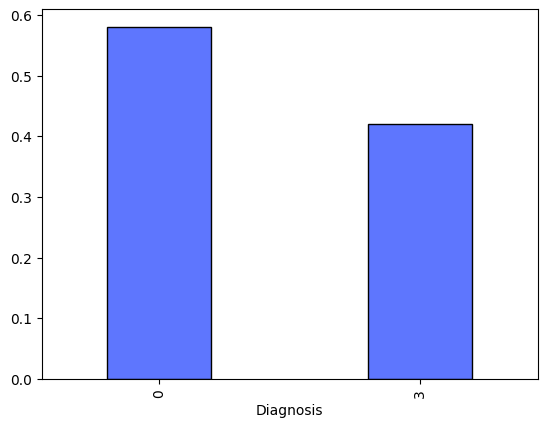

In [12]:
y_split_one.value_counts(normalize=True).plot(kind="bar",
                                                color = "#5e76fe",
                                                width = 0.4,
                                                edgecolor = "black",)

### Test

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    combined_group_two.drop("Diagnosis", axis=1),  
    combined_group_two["Diagnosis"],  
    test_size=0.3,  
    random_state=0,  
)

X_train.shape, X_test.shape

((226, 23), (98, 23))

In [7]:
pipe = Pipeline([
    ("imputer", MeanMedianImputer(
        imputation_method="mean", 
        variables=[
            'MMSE0m', 'HipsASMbaseline', 'HipsContrastbaseline',
            'HipsCorelationbaseline', 'HipsVariancebaseline',
            'HipsSumAveragebaseline', 'HipsSumVariancebaseline',
            'HipsEntropybaseline', 'HipsClusterShadebaseline', 
            'ERCsASMbaseline', 'ERCsContrastbaseline', 
            'ERCsCorelationbaseline', 'ERCsVariancebaseline', 
            'ERCsSumAveragebaseline', 'ERCsSumVariancebaseline',
            'ERCsEntropybaseline', 'ERCsClusterShadebaseline', 
            'ERCs_thicknessbaseline', 'ERCsVolumebaseline', 
            'HipposcampusVolumebaseline'
        ]
    )),
    ("scaler", StandardScaler().set_output(transform="pandas")),
])

pipe.fit(X_train)

# let's transform the data with the pipeline
X_train_scaled = pipe.transform(X_train)
X_test_scaled = pipe.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score, make_scorer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def run_model(model, classifier_name, X_train, y_train):
        
        kf = StratifiedKFold(n_splits=5,
                             shuffle=True,
                             random_state=42,
        )
        
        metrics = {"accuracy": make_scorer(accuracy_score),
                   "balanced_accuracy": make_scorer(balanced_accuracy_score),  
                   "precision": make_scorer(precision_score, average="weighted"), 
                   "recall": make_scorer(recall_score, average="weighted"), 
                   "f1_weighted": make_scorer(f1_score, average="weighted"),
                   "roc_auc_ovr_weighted": make_scorer(roc_auc_score, 
                                                       average="weighted", 
                                                       multi_class="ovr", 
                                                       response_method="predict_proba",),
        }
        
        cross_val_results = cross_validate(model,
                                           X_train,
                                           y_train,
                                           cv=kf,
                                           scoring=metrics,
                                           return_train_score=True,
        )
                
        metric_names = list(metrics.keys())
        mean_train = [round(np.mean(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        std_train = [round(np.std(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        mean_test = [round(np.mean(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        std_test = [round(np.std(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        time = round(np.mean(cross_val_results[f"fit_time"]), 3)
                
        cv_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Fit Time": time,
                "Metric": metric_names,
                "Mean Train": mean_train,
                "Std Train": std_train,
                "Mean Test": mean_test,
                "Std Test": std_test,
        })
        
        fit_model = model.fit(X_train, y_train)
        
        return fit_model, cv_metrics_df


In [14]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight="balanced",
        )
lg = LogisticRegression(multi_class = "auto", solver = "lbfgs", max_iter = 1000, random_state = 42)

svm = SVC(kernel ='rbf', decision_function_shape ='ovr', probability = True, random_state = 42)

dt = DecisionTreeClassifier(criterion ='gini', max_depth = 5, min_samples_split = 10,
                                                  min_samples_leaf = 5, max_features = 'sqrt', random_state = 42)

In [16]:
model_rf, metrics_rf = run_model(rf, "Random Forest", X_train, y_train)
model_dt, metrics_dt = run_model(dt, "Decision Tree", X_train, y_train)
model_lg, metrics_lg = run_model(svm, "Logistic Regression", X_train_scaled, y_train)
model_svm, metrics_svm = run_model(lg, "Support Vector Machine", X_train_scaled, y_train)

c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv

In [17]:
validation_df = pd.concat([metrics_rf, metrics_dt, metrics_lg, metrics_svm])
validation_df_report = validation_df.set_index(["Classifier", "Fit Time", "Metric"])
validation_df_report

Mean Train  Std Train  \
Classifier             Fit Time Metric                                        
Random Forest          0.362    accuracy                   1.000      0.000   
                                balanced_accuracy          1.000      0.000   
                                precision                  1.000      0.000   
                                recall                     1.000      0.000   
                                f1_weighted                1.000      0.000   
                                roc_auc_ovr_weighted       1.000      0.000   
Decision Tree          0.005    accuracy                   0.921      0.024   
                                balanced_accuracy          0.921      0.026   
                                precision                  0.926      0.024   
                                recall                     0.921      0.024   
                                f1_weighted                0.921      0.024   
                                roc_auc_ovr_weighted       0.977      0.014   
Logistic Regression    0.014    accuracy                   0.982      0.004   
                                balanced_accuracy          0.979      0.005   
                                precision                  0.983      0.004   
                                recall                     0.982      0.004   
                                f1_weighted                0.982      0.004   
                                roc_auc_ovr_weighted       0.999      0.000   
Support Vector Machine 0.011    accuracy                   0.987      0.004   
                                balanced_accuracy          0.985      0.004   
                                precision                  0.987      0.004   
                                recall                     0.987      0.004   
                                f1_weighted                0.987      0.004   
                                roc_auc_ovr_weighted       0.999      0.000   

                                                      Mean Test  Std Test  
Classifier             Fit Time Metric                                     
Random Forest          0.362    accuracy                  0.960     0.026  
                                balanced_accuracy         0.958     0.028  
                                precision                 0.961     0.026  
                                recall                    0.960     0.026  
                                f1_weighted               0.960     0.026  
                                roc_auc_ovr_weighted      0.989     0.014  
Decision Tree          0.005    accuracy                  0.823     0.055  
                                balanced_accuracy         0.819     0.056  
                                precision                 0.824     0.053  
                                recall                    0.823     0.055  
                                f1_weighted               0.823     0.055  
                                roc_auc_ovr_weighted      0.855     0.037  
Logistic Regression    0.014    accuracy                  0.956     0.014  
                                balanced_accuracy         0.951     0.014  
                                precision                 0.957     0.014  
                                recall                    0.956     0.014  
                                f1_weighted               0.956     0.014  
                                roc_auc_ovr_weighted      0.986     0.010  
Support Vector Machine 0.011    accuracy                  0.978     0.014  
                                balanced_accuracy         0.977     0.015  
                                precision                 0.978     0.014  
                                recall                    0.978     0.014  
                                f1_weighted               0.978     0.014  
                                roc_auc_ovr_weighted      0.996     0.004

In [18]:
import time

def model_eval(model, classifier_name, X_train, X_test, y_train, y_test):
    start_time = time.time()
    
    # Ensure that y_train and y_test are 1D arrays
    y_train = np.array(y_train).ravel()
    y_test = np.array(y_test).ravel()
    
    # Get predicted probabilities for ROC AUC
    pred_train_proba = model.predict_proba(X_train)
    pred_test_proba = model.predict_proba(X_test)
    
    # Get predicted classes for other metrics
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # For binary classification, use the probability of the positive class only:
    roc_auc_train = roc_auc_score(y_train, pred_train_proba[:, 1])
    roc_auc_test = roc_auc_score(y_test, pred_test_proba[:, 1])
    
    # Calculate metrics
    metrics_train = {
        "accuracy": round(accuracy_score(y_train, pred_train), 3),
        "balanced_accuracy": round(balanced_accuracy_score(y_train, pred_train), 3),
        "precision": round(precision_score(y_train, pred_train, average="weighted"), 3),
        "recall": round(recall_score(y_train, pred_train, average="weighted"), 3),
        "f1_weighted": round(f1_score(y_train, pred_train, average="weighted"), 3),
        "roc_auc": round(roc_auc_train, 3),
    }
    
    metrics_test = {
        "accuracy": round(accuracy_score(y_test, pred_test), 3),
        "balanced_accuracy": round(balanced_accuracy_score(y_test, pred_test), 3),
        "precision": round(precision_score(y_test, pred_test, average="weighted"), 3),
        "recall": round(recall_score(y_test, pred_test, average="weighted"), 3),
        "f1_weighted": round(f1_score(y_test, pred_test, average="weighted"), 3),
        "roc_auc": round(roc_auc_test, 3),
    }
            
    elapsed_time = time.time() - start_time

    # Create the DataFrame without additional rounding issues
    pred_metrics_df = pd.DataFrame({
        "Classifier": classifier_name,
        "Classification Time": round(elapsed_time, 3),
        "Metric": list(metrics_train.keys()),
        "Train data": list(metrics_train.values()),
        "Test data": list(metrics_test.values()),
    })
    
    return pred_metrics_df

In [19]:
pred_rf = model_eval(model_rf,"Random Forest", X_train, X_test, y_train, y_test)
pred_dt = model_eval(model_dt,"Decision Tree", X_train, X_test, y_train, y_test)
pred_lg = model_eval(model_lg,"Logistic Regression", X_train_scaled, X_test_scaled, y_train, y_test)
pred_svm = model_eval(model_svm,"Support Vector Machine", X_train_scaled, X_test_scaled, y_train, y_test)

In [20]:
prediction_df = pd.concat([pred_rf, pred_dt, pred_lg, pred_svm])
prediction_df_report = prediction_df.set_index(["Classifier", "Classification Time", "Metric"])
prediction_df_report

Train data  \
Classifier             Classification Time Metric                          
Random Forest          0.112               accuracy                1.000   
                                           balanced_accuracy       1.000   
                                           precision               1.000   
                                           recall                  1.000   
                                           f1_weighted             1.000   
                                           roc_auc                 1.000   
Decision Tree          0.038               accuracy                0.898   
                                           balanced_accuracy       0.899   
                                           precision               0.900   
                                           recall                  0.898   
                                           f1_weighted             0.899   
                                           roc_auc                 0.964   
Logistic Regression    0.039               accuracy                0.982   
                                           balanced_accuracy       0.979   
                                           precision               0.983   
                                           recall                  0.982   
                                           f1_weighted             0.982   
                                           roc_auc                 0.999   
Support Vector Machine 0.033               accuracy                0.982   
                                           balanced_accuracy       0.982   
                                           precision               0.982   
                                           recall                  0.982   
                                           f1_weighted             0.982   
                                           roc_auc                 0.999   

                                                              Test data  
Classifier             Classification Time Metric                        
Random Forest          0.112               accuracy               0.949  
                                           balanced_accuracy      0.947  
                                           precision              0.950  
                                           recall                 0.949  
                                           f1_weighted            0.949  
                                           roc_auc                0.992  
Decision Tree          0.038               accuracy               0.765  
                                           balanced_accuracy      0.772  
                                           precision              0.788  
                                           recall                 0.765  
                                           f1_weighted            0.770  
                                           roc_auc                0.780  
Logistic Regression    0.039               accuracy               0.969  
                                           balanced_accuracy      0.963  
                                           precision              0.969  
                                           recall                 0.969  
                                           f1_weighted            0.969  
                                           roc_auc                0.994  
Support Vector Machine 0.033               accuracy               0.959  
                                           balanced_accuracy      0.955  
                                           precision              0.959  
                                           recall                 0.959  
                                           f1_weighted            0.959  
                                           roc_auc                0.993